<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Machine-learning-handson/blob/main/Transforming_ad_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [ ]:
ads = pd.read_csv('/content/ad_conversion.csv')
print(ads.head())

   spent_usd  n_impressions  n_clicks
0       1.43           7350         1
1       1.82          17861         2
2       1.25           4259         1
3       1.29           4133         1
4       4.77          15615         3


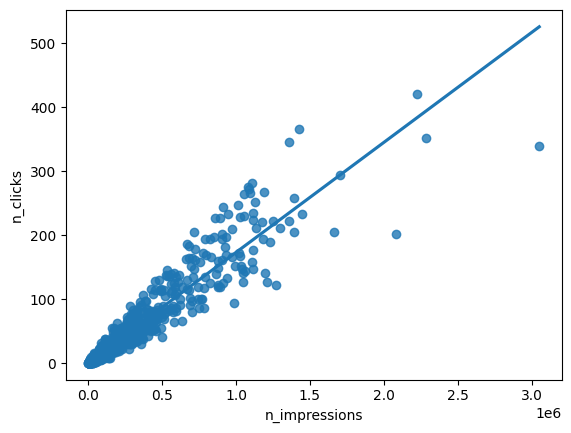

In [ ]:
y='n_clicks'
x='n_impressions'

sns.regplot(y='n_clicks', x='n_impressions', data=ads,ci=None)
plt.show()

In [ ]:
ads['n_clicks_sqrt'] = np.sqrt(ads['n_clicks'])
ads['n_impressions_sqrt']=np.sqrt(ads['n_impressions'])

print(ads.head())

   spent_usd  n_impressions  n_clicks  n_clicks_sqrt  n_impressions_sqrt
0       1.43           7350         1       1.000000           85.732141
1       1.82          17861         2       1.414214          133.645052
2       1.25           4259         1       1.000000           65.261014
3       1.29           4133         1       1.000000           64.288413
4       4.77          15615         3       1.732051          124.959994


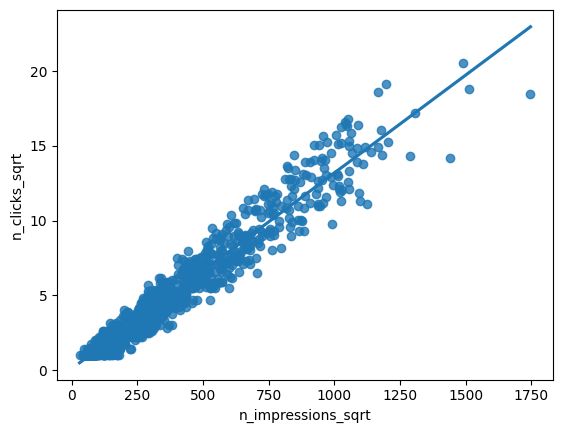

In [ ]:
sns.regplot(x='n_impressions_sqrt', y='n_clicks_sqrt',data=ads, ci=None)
plt.show()

In [ ]:
clicks_vs_impression = ols('n_clicks_sqrt ~ n_impressions_sqrt', data = ads).fit()
print(clicks_vs_impression.params)

Intercept             0.084330
n_impressions_sqrt    0.013096
dtype: float64


Transforming data to power 0.25

In [ ]:
ads['n_clicks_qdrt'] = ads['n_clicks'] ** 0.25
ads['n_impressions_qdrt']=ads['n_impressions'] **0.25

print(ads.head())

   spent_usd  n_impressions  n_clicks  n_clicks_sqrt  n_impressions_sqrt  \
0       1.43           7350         1       1.000000           85.732141   
1       1.82          17861         2       1.414214          133.645052   
2       1.25           4259         1       1.000000           65.261014   
3       1.29           4133         1       1.000000           64.288413   
4       4.77          15615         3       1.732051          124.959994   

   n_clicks_qdrt  n_impressions_qdrt  
0       1.000000            9.259165  
1       1.189207           11.560495  
2       1.000000            8.078429  
3       1.000000            8.018006  
4       1.316074           11.178551  


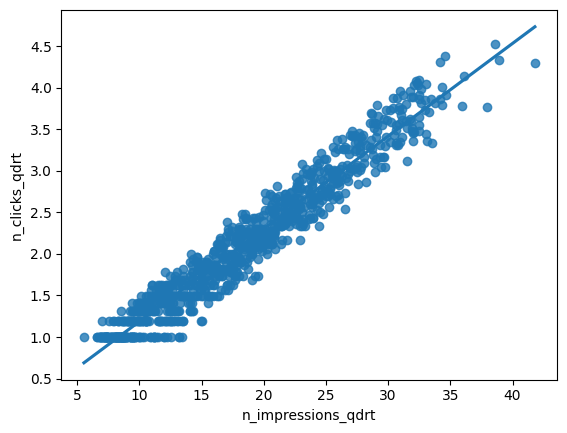

In [ ]:
sns.regplot(x='n_impressions_qdrt', y='n_clicks_qdrt',data=ads, ci=None)
plt.show()

In [ ]:
#Linear regression

clicks_vs_impression = ols('n_clicks_qdrt ~ n_impressions_qdrt',data=ads).fit()
print(clicks_vs_impression.params)

Intercept             0.071748
n_impressions_qdrt    0.111533
dtype: float64


   n_impressions_qdrt  n_impressions  n_clicks_qdrt
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063


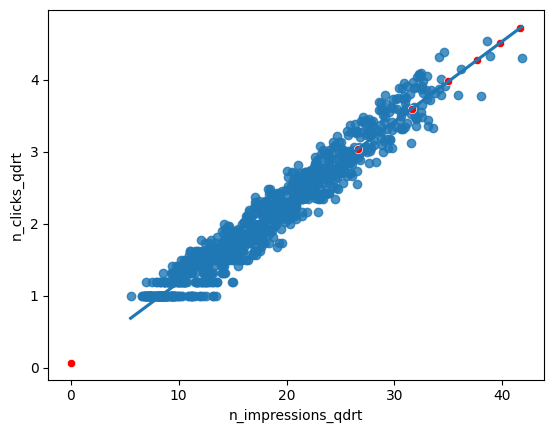

In [ ]:
#Prediction:

explanatory_data = pd.DataFrame({"n_impressions_qdrt": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

predictions = explanatory_data.assign(n_clicks_qdrt = clicks_vs_impression.predict(explanatory_data))
print(predictions.head())

#Back Transform,
predictions['n_clicks'] = predictions['n_clicks_qdrt'] ** 4

#Visualizing the transformed data
fig = plt.figure()
sns.regplot(x="n_impressions_qdrt", y="n_clicks_qdrt", data=ads, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="n_impressions_qdrt", y="n_clicks_qdrt", data=predictions, color='red')
plt.show()